# Закгузка необходимых библиотек

In [1]:
!pip install tensorflow

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import confusion_matrix         # Вычислить матрицу неточностей для оценки точности классификации
from sklearn.model_selection import train_test_split # для разделения массивов данных на два подмножества: 
                                                     # для обучающих данных и для данных тестирования.


from sklearn.neighbors import KNeighborsClassifier   # Модель к-ближайших соседей
from sklearn.svm import SVC                          # Модель опорных векторов
from sklearn.tree import DecisionTreeClassifier      # Дерево принятия решения
import sklearn.externals
import joblib                                        # Набор инструментов для облегчения конвейерной обработки

from tensorflow.keras import layers                  # Слои являются основными строительными блоками нейронных сетей в Керасе. 
                                                     # Слой состоит из функции вычисления тензорного входа и выхода тензора (метод вызова слоя) 
                                                     # и некоторого состояния, хранящегося в переменных TensorFlow (веса слоя).
from tensorflow.keras.models import Sequential       # Линейный стек слоев
from tensorflow.keras.layers import Dense, ReLU, LSTM, Bidirectional # Виды слоев
from tensorflow import keras

from wfdb.io import get_record_list
from wfdb import rdsamp
import pywt
import scipy
from scipy import signal

print('библиотеки загружены')

библиотеки загружены


# Загрузка массивов

In [5]:
def load_mass(version):
    # Загрузка массива данных в зависимости от версии предобработки
# Датасет для обучения
    df = pd.read_csv("train_v"+version+".csv", header=None)
    x_train = df.values[:, :-3]
    y_train = df.values[:, -3].astype(int)

    n_of_ecg = df.shape[0]
    len_ecg = x_train.shape[1]
    y_train_s = np.empty(shape = [n_of_ecg])
    for i in range(n_of_ecg):
        y_train_s[i] = max(df.values[i, -2:].astype(int))
    y_train_s = y_train_s.astype(int)


# Датасет для валидации
    df = pd.read_csv("validate_v"+version+".csv", header=None)
    x_validate = df.values[:, :-3]
    y_validate = df.values[:, -3].astype(int)

    n_of_ecg = df.shape[0]
    len_ecg = x_validate.shape[1]
    y_validate_s = np.empty(shape = [n_of_ecg])
    for i in range(n_of_ecg):
        y_validate_s[i] = max(df.values[i, -2:].astype(int))
    y_validate_s = y_validate_s.astype(int)

# Тестовый датасет
    df = pd.read_csv("test_v"+version+".csv", header=None)
    x_test = df.values[:, :-3]
    y_test = df.values[:, -3].astype(int)


    y_test_s = np.empty(shape = [n_of_ecg])
    for i in range(n_of_ecg):
        y_test_s[i] = max(df.values[i, -2:].astype(int))
    y_test_s = y_test_s.astype(int)

    
    return x_train,y_train,x_test,y_test,x_validate,y_validate,y_train_s,y_test_s,y_validate_s

In [6]:
x_tr_v0,y_tr_v0,x_te_v0,y_te_v0,x_val_v0,y_val_v0,y_tr_s_v0,y_te_s_v0,y_val_s_v0 = load_mass('0')
x_tr_v1,y_tr_v1,x_te_v1,y_te_v1,x_val_v1,y_val_v1,y_tr_s_v1,y_te_s_v1,y_val_s_v1 = load_mass('1')
x_tr_v2,y_tr_v2,x_te_v2,y_te_v2,x_val_v2,y_val_v2,y_tr_s_v2,y_te_s_v2,y_val_s_v2 = load_mass('2')
x_tr_v3,y_tr_v3,x_te_v3,y_te_v3,x_val_v3,y_val_v3,y_tr_s_v3,y_te_s_v3,y_val_s_v3 = load_mass('3')
x_tr_v4,y_tr_v4,x_te_v4,y_te_v4,x_val_v4,y_val_v4,y_tr_s_v4,y_te_s_v4,y_val_s_v4 = load_mass('4')
x_tr_v5,y_tr_v5,x_te_v5,y_te_v5,x_val_v5,y_val_v5,y_tr_s_v5,y_te_s_v5,y_val_s_v5 = load_mass('6')
x_tr_v6,y_tr_v6,x_te_v6,y_te_v6,x_val_v6,y_val_v6,y_tr_s_v6,y_te_s_v6,y_val_s_v6 = load_mass('6')
x_tr_v7,y_tr_v7,x_te_v7,y_te_v7,x_val_v7,y_val_v7,y_tr_s_v7,y_te_s_v7,y_val_s_v7 = load_mass('7')
x_tr_v8,y_tr_v8,x_te_v8,y_te_v8,x_val_v8,y_val_v8,y_tr_s_v8,y_te_s_v8,y_val_s_v8 = load_mass('8')

train
x (100178, 187)
y (100178,)
test
x (20036, 187)
y (20036,)
train
x (100199, 540)
y (100199,)
test
x (20040, 540)
y (20040,)
train
x (100178, 187)
y (100178,)
test
x (20036, 187)
y (20036,)
train
x (100178, 187)
y (100178,)
test
x (20036, 187)
y (20036,)
train
x (100178, 187)
y (100178,)
test
x (20036, 187)
y (20036,)
train
x (100199, 540)
y (100199,)
test
x (20040, 540)
y (20040,)


In [ ]:
del df

# Построение моделей

## Метод ближайших соседей

### Обучение

In [7]:
knn_v0 = knn_v1 = knn_v2 = knn_v3 = knn_v4 = knn_v5 = knn_v6 = knn_v7 = knn_v8 = KNeighborsClassifier()

In [8]:
%%time
knn_v0.fit(x_tr_v0, y_tr_v0)

Wall time: 8.04 s


KNeighborsClassifier()

In [9]:
%%time
knn_v1.fit(x_tr_v1, y_tr_v1)

Wall time: 21 s


KNeighborsClassifier()

In [10]:
%%time
knn_v2.fit(x_tr_v2, y_tr_v2)

Wall time: 6.93 s


KNeighborsClassifier()

In [11]:
%%time
knn_v3.fit(x_tr_v3, y_tr_v3)

Wall time: 5.77 s


KNeighborsClassifier()

In [12]:
%%time
knn_v4.fit(x_tr_v4, y_tr_v4)

Wall time: 6.14 s


KNeighborsClassifier()

In [13]:
%%time
knn_v5.fit(x_tr_v5, y_tr_v5)

Wall time: 18.3 s


KNeighborsClassifier()

In [ ]:
%%time
knn_v6.fit(x_tr_v6, y_tr_v6)

In [ ]:
%%time
knn_v7.fit(x_tr_v7, y_tr_v7)

In [ ]:
%%time
knn_v8.fit(x_tr_v8, y_tr_v8)

### Прогноз

In [16]:
%%time
y_pred_v0 = (knn_v0.predict( x_te_v0 ) >= 0.15)

ValueError: query data dimension must match training data dimension

In [15]:
%%time
y_pred_v1 = (knn_v1.predict( x_te_v1 ) >= 0.15)

Wall time: 18min 59s


In [17]:
%%time
y_pred_v2 = (knn_v2.predict( x_te_v2 ) >= 0.15)

ValueError: query data dimension must match training data dimension

In [18]:
%%time
y_pred_v3 = (knn_v3.predict( x_te_v3 ) >= 0.15)

ValueError: query data dimension must match training data dimension

In [19]:
%%time
y_pred_v4 = (knn_v4.predict( x_te_v4 ) >= 0.15)

ValueError: query data dimension must match training data dimension

In [20]:
%%time
y_pred_v5 = (knn_v5.predict( x_te_v5 ) >= 0.15)

KeyboardInterrupt: 

In [ ]:
%%time
y_pred_v6 = (knn_v6.predict( x_te_v6 ) >= 0.15)

In [ ]:
%%time
y_pred_v7 = (knn_v7.predict( x_te_v7 ) >= 0.15)

In [ ]:
%%time
y_pred_v8 = (knn_v8.predict( x_te_v8 ) >= 0.15)

### Оценка

In [22]:
def sp_sen_acc_pr(test,pred):
    conf_mat = confusion_matrix(test, pred)
    total = sum(sum(conf_mat))
    
    specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100
    print('Specificity :  ', specificity)
    
    sensitivity = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100
    print('Sensitivity :  ', sensitivity)
    
    accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total*100
    print('Accuracy    :  ',accuracy)
    
    precision = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[0, 1]))*100
    print("Precision   :  ", precision)

In [23]:
print('0')
sp_sen_acc_pr(y_te_v0,y_pred_v0)
print('1')
sp_sen_acc_pr(y_te_v1,y_pred_v1)
print('2')
sp_sen_acc_pr(y_te_v2,y_pred_v2)
print('3')
sp_sen_acc_pr(y_te_v3,y_pred_v3)
print('4')
sp_sen_acc_pr(y_te_v4,y_pred_v4)
print('5')
sp_sen_acc_pr(y_te_v5,y_pred_v5)
print('6')
sp_sen_acc_pr(y_te_v5,y_pred_v6)
print('7')
sp_sen_acc_pr(y_te_v5,y_pred_v7)
print('8')
sp_sen_acc_pr(y_te_v5,y_pred_v8)

0
1
Specificity :   80.69184609954112
Sensitivity :   83.08827802638461
Accuracy    :   82.749500998004
Precision   :   96.31500943142011
2
3
4
5


In [2]:
def alldata(x_test,x_train,y_test,y_train,x_validate,y_validate,version):
    # совмещение всех данных для кросс-валидации
    if (version == 1) or (version == 5) or (version == 8):
        x = np.empty(shape = [2*x_test.shape[0]+x_train.shape[0],540])
    elif (version == 6) or (version == 7):
        x = np.empty(shape = [2*x_test.shape[0]+x_train.shape[0],187])
    else:
        x = np.empty(shape = [2*x_test.shape[0]+x_train.shape[0],190])
        
    y = np.empty(shape = [2*y_test.shape[0]+y_train.shape[0]])


    x = np.concatenate((x_test, x_train, x_validate), axis=0)
    y = np.concatenate((y_test, y_train, y_validate), axis=0)

    return x,y

In [100]:
def cross_val(model,x,y):
    score = cross_val_score(model, x, y, cv=5)
    print(score)
    print("%0.5f accuracy with a standard deviation of %0.5f" % (score.mean()*100, score.std()*100))

In [102]:
x,y = alldata(x_te_v0,x_tr_v0,y_te_v0,y_tr_v0,x_val_v0,y_val_v0,'0')
cross_val(knn_v0,x,y)

x (140249, 187)
y (140249,)
[0.97483066 0.9771836  0.97582888 0.97372549 0.97461585]
97.52369 accuracy with a standard deviation of 0.11811


In [3]:
x,y = alldata(x_te_v1,x_tr_v1,y_te_v1,y_tr_v1,x_val_v1,y_val_v1,'1')
cross_val(knn_v1,x,y)

NameError: name 'x_te_v1' is not defined

In [ ]:
x,y = alldata(x_te_v2,x_tr_v2,y_te_v2,y_tr_v2,x_val_v2,y_val_v2,'2')
cross_val(knn_v2,x,y)

In [ ]:
x,y = alldata(x_te_v3,x_tr_v3,y_te_v3,y_tr_v3,x_val_v3,y_val_v3,'3')
cross_val(knn_v3,x,y)

In [ ]:
x,y = alldata(x_te_v4,x_tr_v4,y_te_v4,y_tr_v4,x_val_v4,y_val_v4,'4')
cross_val(knn_v4,x,y)

In [ ]:
x,y = alldata(x_te_v5,x_tr_v5,y_te_v5,y_tr_v5,x_val_v5,y_val_v5,'5')
cross_val(knn_v5,x,y)

In [ ]:
x,y = alldata(x_te_v6,x_tr_v6,y_te_v6,y_tr_v6,x_val_v6,y_val_v6,'6')
cross_val(knn_v6,x,y)

In [ ]:
x,y = alldata(x_te_v7,x_tr_v7,y_te_v7,y_tr_v7,x_val_v7,y_val_v7,'7')
cross_val(knn_v7,x,y)

In [ ]:
x,y = alldata(x_te_v8,x_tr_v8,y_te_v8,y_tr_v8,x_val_v8,y_val_v8,'8')
cross_val(knn_v8,x,y)

In [27]:
conf_mat = confusion_matrix(y_test, y_pred)

print(" K Nearest Neighbor Model ")
specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100
print('Specificity : ', specificity)
sensitivity = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100
print('Sensitivity : ', sensitivity)
print("Accuracy    : ", knn_model.score(x_test_filt, y_test)*100)
precision = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[0, 1]))*100
print("Precision   : ", precision)

 K Nearest Neighbor Model 
Specificity :  93.32104367555304
Sensitivity :  96.32345937708354
Accuracy    :  95.56862745098039
Precision    :  97.7243078707059


## Сохранение модели


In [100]:
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

In [105]:
KNN = joblib.load('knn_model.pkl')
result = KNN.score(x_test, y_test)

(28050, 187)
0.9718003565062389


### метод опорных векторов

In [423]:
%%time
svm_model = SVC(gamma='auto')
svm_model.fit(x_train, y_train)

Wall time: 14min 6s


SVC(gamma='auto')

In [457]:
%%time
y_predicted = (svm_model.predict(x_test) >= 0.15)

Wall time: 3min 20s


In [458]:
#tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
conf_mat = confusion_matrix(y_test, y_predicted)
sensitivity = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100
specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100

print(" Support Vector Machine Model ")
print('Specificity : ', specificity)
print('Sensitivity : ', sensitivity)
print("Accuracy    : ", svm_model.score(x_test, y_test)*100)
precision = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[0, 1]))*100
print("Precision   : ", precision)

 Support Vector Machine Model 
Specificity :  84.08080059303188
Sensitivity :  87.56952414584622
Accuracy    :  86.89839572192514
Precision    :  95.8496400444509


In [425]:
score_s = cross_val_score(svm_model, x, y, cv=5)
print(score_s)
print("%0.5f accuracy with a standard deviation of %0.5f" % (score_s.mean()*100, score_s.std()*100))

[0.87418895 0.87176471 0.87001783 0.87393939 0.86769582]
87.15213 accuracy with a standard deviation of 0.24461


In [110]:
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

In [111]:
SVM = joblib.load('svm_model.pkl')
result = SVM.score(x_test, y_test)
print(result)

0.8689839572192514


### дерево принятия решения

In [427]:
%%time
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

Wall time: 24.8 s


DecisionTreeClassifier()

In [455]:
%%time
y_predicted = (dt_model.predict( x_test ) >= 0.15)

Wall time: 30.9 ms


In [456]:
conf_mat = confusion_matrix(y_test, y_predicted)
sensitivity = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100
specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100

print(" Decision Tree Model ")
print('Specificity : ', specificity)
print('Sensitivity : ', sensitivity)
print("Accuracy    : ", dt_model.score(x_test, y_test)*100)
precision = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[0, 1]))*100
print("Precision   : ", precision)

 Decision Tree Model 
Specificity :  90.20385825694349
Sensitivity :  96.33576008871317
Accuracy    :  94.7379679144385
Precision   :  96.54056143402426


In [432]:
score_d = cross_val_score(dt_model, x, y, cv=5)
print(score_d)
print("%0.5f accuracy with a standard deviation of %0.5f" % (score_d.mean()*100, score_d.std()*100))

[0.94955437 0.95087344 0.95226381 0.95240642 0.94933866]
95.08873 accuracy with a standard deviation of 0.12944


In [116]:
joblib.dump(dt_model,'dt_model.pkl')

['dt_model.pkl']

In [117]:
DT = joblib.load('dt_model.pkl')
result = DT.score(x_test, y_test)
print(result)

0.9472727272727273


# Глубокое обучение

## нейросеть

#### обучение

In [440]:
feature_columns = [tf.feature_column.numeric_column('beat', shape=[187])]

estimator = tf.estimator.DNNClassifier(
   hidden_units=[256, 64, 16],
   feature_columns=feature_columns,
   model_dir='DNN_model',
   n_classes=2,
   optimizer=tf.keras.optimizers.Adam(lr=1e-4),
   dropout=0.1
   
)


input_fn_train = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'beat': x_train},
    y=y_train,
    batch_size=187,
    shuffle=True,
    num_epochs=None
)

metric = [tf.keras.metrics.TruePositives(name='tp'),tf.keras.metrics.TrueNegatives(name='tn'), 
          tf.keras.metrics.FalsePositives(name='fp'),tf.keras.metrics.FalseNegatives(name='fn')]

def tn(labels, predictions):
    auc_metric = tf.keras.metrics.TrueNegatives(name='tn')
    auc_metric.update_state(y_true=labels, y_pred=predictions['logistic'])
    return {'tn': auc_metric}



def fp(labels, predictions):
    auc_metric = tf.keras.metrics.FalsePositives(name='fp')
    auc_metric.update_state(y_true=labels, y_pred=predictions['logistic'])
    return {'fp': auc_metric}

estimator = tf.estimator.add_metrics(estimator, tn)
estimator = tf.estimator.add_metrics(estimator, fp)   


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'DNN_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using config: {'_model_dir': 'DNN_model', '_tf_random_seed': None, '_sav

In [441]:
%%time
hist = estimator.train(input_fn=input_fn_train, steps=400000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into DNN_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.843967, step = 0
INFO:tensorflow:global_step/sec: 311.39
INFO:tensorflow:loss = 0.60546803, step = 100 (0.322 sec)
INFO:tensorflow:global_step/sec: 367.282
INFO:tensorflow:loss = 0.4988881, step = 200 (0.272 sec)
INFO:tensorflow:global_step/sec: 363.286
INFO:tensorflow:loss = 0.4566619, step = 300 (0.275 sec)
INFO:tensorflow:global_step/sec: 355.559
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 363.288
INFO:tensorflow:loss = 0.14677425, step = 7700 (0.275 sec)
INFO:tensorflow:global_step/sec: 378.368
INFO:tensorflow:loss = 0.1552831, step = 7800 (0.264 sec)
INFO:tensorflow:global_step/sec: 376.946
INFO:tensorflow:loss = 0.08735643, step = 7900 (0.264 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.067525364, step = 8000 (0.267 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.15128599, step = 8100 (0.268 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.15654537, step = 8200 (0.265 sec)
INFO:tensorflow:global_step/sec: 378.368
INFO:tensorflow:loss = 0.09146162, step = 8300 (0.264 sec)
INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.06545231, step = 8400 (0.267 sec)
INFO:tensorflow:global_step/sec: 372.743
INFO:tensorflow:loss = 0.09130052, step = 8500 (0.267 sec)
INFO:tensorflow:global_step/sec: 379.8
INFO:tensorflow:loss = 0.120159425, step = 8600 (0.264 sec)
I

INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.063410655, step = 15900 (0.266 sec)
INFO:tensorflow:global_step/sec: 375.533
INFO:tensorflow:loss = 0.08689338, step = 16000 (0.265 sec)
INFO:tensorflow:global_step/sec: 384.167
INFO:tensorflow:loss = 0.10091336, step = 16100 (0.260 sec)
INFO:tensorflow:global_step/sec: 385.644
INFO:tensorflow:loss = 0.101159215, step = 16200 (0.260 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.12648924, step = 16300 (0.265 sec)
INFO:tensorflow:global_step/sec: 379.802
INFO:tensorflow:loss = 0.08579887, step = 16400 (0.263 sec)
INFO:tensorflow:global_step/sec: 382.7
INFO:tensorflow:loss = 0.09823265, step = 16500 (0.261 sec)
INFO:tensorflow:global_step/sec: 382.701
INFO:tensorflow:loss = 0.13921723, step = 16600 (0.260 sec)
INFO:tensorflow:global_step/sec: 378.366
INFO:tensorflow:loss = 0.1099887, step = 16700 (0.265 sec)
INFO:tensorflow:global_step/sec: 379.802
INFO:tensorflow:loss = 0.07768907, step = 16800 (0.

INFO:tensorflow:loss = 0.037756797, step = 24000 (0.265 sec)
INFO:tensorflow:global_step/sec: 382.701
INFO:tensorflow:loss = 0.1029609, step = 24100 (0.261 sec)
INFO:tensorflow:global_step/sec: 382.699
INFO:tensorflow:loss = 0.07380542, step = 24200 (0.261 sec)
INFO:tensorflow:global_step/sec: 378.368
INFO:tensorflow:loss = 0.059382476, step = 24300 (0.263 sec)
INFO:tensorflow:global_step/sec: 379.802
INFO:tensorflow:loss = 0.09654806, step = 24400 (0.263 sec)
INFO:tensorflow:global_step/sec: 384.167
INFO:tensorflow:loss = 0.068575986, step = 24500 (0.261 sec)
INFO:tensorflow:global_step/sec: 382.701
INFO:tensorflow:loss = 0.049983863, step = 24600 (0.261 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.05174551, step = 24700 (0.264 sec)
INFO:tensorflow:global_step/sec: 381.246
INFO:tensorflow:loss = 0.1250509, step = 24800 (0.262 sec)
INFO:tensorflow:global_step/sec: 385.644
INFO:tensorflow:loss = 0.057328567, step = 24900 (0.259 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:loss = 0.047173157, step = 32100 (0.261 sec)
INFO:tensorflow:global_step/sec: 381.245
INFO:tensorflow:loss = 0.052060124, step = 32200 (0.262 sec)
INFO:tensorflow:global_step/sec: 379.802
INFO:tensorflow:loss = 0.049626365, step = 32300 (0.264 sec)
INFO:tensorflow:global_step/sec: 379.8
INFO:tensorflow:loss = 0.058387812, step = 32400 (0.263 sec)
INFO:tensorflow:global_step/sec: 384.167
INFO:tensorflow:loss = 0.045420576, step = 32500 (0.260 sec)
INFO:tensorflow:global_step/sec: 381.245
INFO:tensorflow:loss = 0.075873725, step = 32600 (0.262 sec)
INFO:tensorflow:global_step/sec: 378.369
INFO:tensorflow:loss = 0.051389378, step = 32700 (0.264 sec)
INFO:tensorflow:global_step/sec: 379.8
INFO:tensorflow:loss = 0.109614916, step = 32800 (0.263 sec)
INFO:tensorflow:global_step/sec: 382.699
INFO:tensorflow:loss = 0.054683197, step = 32900 (0.261 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.07405024, step = 33000 (0.265 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.05420679, step = 40200 (0.270 sec)
INFO:tensorflow:global_step/sec: 364.609
INFO:tensorflow:loss = 0.04975732, step = 40300 (0.274 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.04035803, step = 40400 (0.266 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.018373698, step = 40500 (0.269 sec)
INFO:tensorflow:global_step/sec: 361.977
INFO:tensorflow:loss = 0.04125813, step = 40600 (0.276 sec)
INFO:tensorflow:global_step/sec: 364.608
INFO:tensorflow:loss = 0.036182348, step = 40700 (0.274 sec)
INFO:tensorflow:global_step/sec: 319.93
INFO:tensorflow:loss = 0.0273355, step = 40800 (0.313 sec)
INFO:tensorflow:global_step/sec: 359.382
INFO:tensorflow:loss = 0.042358562, step = 40900 (0.278 sec)
INFO:tensorflow:global_step/sec: 368.63
INFO:tensorflow:loss = 0.047455866, step = 41000 (0.271 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.06624011, step = 41100 (0.267 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.03806156, step = 48300 (0.264 sec)
INFO:tensorflow:global_step/sec: 376.946
INFO:tensorflow:loss = 0.050773542, step = 48400 (0.266 sec)
INFO:tensorflow:global_step/sec: 382.699
INFO:tensorflow:loss = 0.023828955, step = 48500 (0.261 sec)
INFO:tensorflow:global_step/sec: 382.7
INFO:tensorflow:loss = 0.09474569, step = 48600 (0.261 sec)
INFO:tensorflow:global_step/sec: 299.355
INFO:tensorflow:loss = 0.04804935, step = 48700 (0.334 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.050438568, step = 48800 (0.265 sec)
INFO:tensorflow:global_step/sec: 385.644
INFO:tensorflow:loss = 0.013563511, step = 48900 (0.259 sec)
INFO:tensorflow:global_step/sec: 379.802
INFO:tensorflow:loss = 0.045239992, step = 49000 (0.263 sec)
INFO:tensorflow:global_step/sec: 376.944
INFO:tensorflow:loss = 0.056916732, step = 49100 (0.265 sec)
INFO:tensorflow:global_step/sec: 379.801
INFO:tensorflow:loss = 0.0092928205, step = 49200 (0.263 sec)
INFO:tensorflow:global_st

INFO:tensorflow:loss = 0.02240578, step = 56400 (0.264 sec)
INFO:tensorflow:global_step/sec: 378.368
INFO:tensorflow:loss = 0.041374855, step = 56500 (0.264 sec)
INFO:tensorflow:global_step/sec: 384.167
INFO:tensorflow:loss = 0.056883454, step = 56600 (0.260 sec)
INFO:tensorflow:global_step/sec: 384.165
INFO:tensorflow:loss = 0.08716686, step = 56700 (0.260 sec)
INFO:tensorflow:global_step/sec: 292.325
INFO:tensorflow:loss = 0.043931365, step = 56800 (0.343 sec)
INFO:tensorflow:global_step/sec: 376.947
INFO:tensorflow:loss = 0.06412201, step = 56900 (0.264 sec)
INFO:tensorflow:global_step/sec: 382.701
INFO:tensorflow:loss = 0.03401422, step = 57000 (0.261 sec)
INFO:tensorflow:global_step/sec: 379.799
INFO:tensorflow:loss = 0.017193807, step = 57100 (0.263 sec)
INFO:tensorflow:global_step/sec: 371.363
INFO:tensorflow:loss = 0.061172668, step = 57200 (0.268 sec)
INFO:tensorflow:global_step/sec: 379.8
INFO:tensorflow:loss = 0.028639447, step = 57300 (0.264 sec)
INFO:tensorflow:global_step

INFO:tensorflow:loss = 0.0627436, step = 64500 (0.263 sec)
INFO:tensorflow:global_step/sec: 356.822
INFO:tensorflow:loss = 0.017415356, step = 64600 (0.280 sec)
INFO:tensorflow:global_step/sec: 368.631
INFO:tensorflow:loss = 0.009617545, step = 64700 (0.272 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.038641226, step = 64800 (0.266 sec)
INFO:tensorflow:global_step/sec: 363.288
INFO:tensorflow:loss = 0.030054977, step = 64900 (0.276 sec)
INFO:tensorflow:global_step/sec: 368.63
INFO:tensorflow:loss = 0.06995829, step = 65000 (0.273 sec)
INFO:tensorflow:global_step/sec: 264.558
INFO:tensorflow:loss = 0.007227707, step = 65100 (0.376 sec)
INFO:tensorflow:global_step/sec: 369.992
INFO:tensorflow:loss = 0.065355256, step = 65200 (0.269 sec)
INFO:tensorflow:global_step/sec: 365.939
INFO:tensorflow:loss = 0.0132454885, step = 65300 (0.273 sec)
INFO:tensorflow:global_step/sec: 365.939
INFO:tensorflow:loss = 0.0150444275, step = 65400 (0.274 sec)
INFO:tensorflow:global_

INFO:tensorflow:loss = 0.051822703, step = 72600 (0.270 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.017370587, step = 72700 (0.266 sec)
INFO:tensorflow:global_step/sec: 382.7
INFO:tensorflow:loss = 0.03528597, step = 72800 (0.261 sec)
INFO:tensorflow:global_step/sec: 376.947
INFO:tensorflow:loss = 0.01580178, step = 72900 (0.265 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.015912915, step = 73000 (0.264 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.012743245, step = 73100 (0.269 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.026307609, step = 73200 (0.266 sec)
INFO:tensorflow:global_step/sec: 368.631
INFO:tensorflow:loss = 0.024119431, step = 73300 (0.271 sec)
INFO:tensorflow:global_step/sec: 376.946
INFO:tensorflow:loss = 0.058399905, step = 73400 (0.265 sec)
INFO:tensorflow:global_step/sec: 381.244
INFO:tensorflow:loss = 0.03419598, step = 73500 (0.262 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:global_step/sec: 378.368
INFO:tensorflow:loss = 0.011817202, step = 80700 (0.265 sec)
INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.03408446, step = 80800 (0.267 sec)
INFO:tensorflow:global_step/sec: 368.632
INFO:tensorflow:loss = 0.013328657, step = 80900 (0.271 sec)
INFO:tensorflow:global_step/sec: 368.63
INFO:tensorflow:loss = 0.024979468, step = 81000 (0.270 sec)
INFO:tensorflow:global_step/sec: 369.991
INFO:tensorflow:loss = 0.022109993, step = 81100 (0.270 sec)
INFO:tensorflow:global_step/sec: 378.368
INFO:tensorflow:loss = 0.028877327, step = 81200 (0.265 sec)
INFO:tensorflow:global_step/sec: 371.362
INFO:tensorflow:loss = 0.03311345, step = 81300 (0.269 sec)
INFO:tensorflow:global_step/sec: 381.244
INFO:tensorflow:loss = 0.012812649, step = 81400 (0.262 sec)
INFO:tensorflow:global_step/sec: 375.535
INFO:tensorflow:loss = 0.011487753, step = 81500 (0.266 sec)
INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.02125057, step = 81

INFO:tensorflow:global_step/sec: 374.131
INFO:tensorflow:loss = 0.03225735, step = 88800 (0.267 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.06762121, step = 88900 (0.265 sec)
INFO:tensorflow:global_step/sec: 379.802
INFO:tensorflow:loss = 0.07542531, step = 89000 (0.264 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.006735325, step = 89100 (0.268 sec)
INFO:tensorflow:global_step/sec: 381.244
INFO:tensorflow:loss = 0.012869404, step = 89200 (0.262 sec)
INFO:tensorflow:global_step/sec: 378.368
INFO:tensorflow:loss = 0.03601773, step = 89300 (0.263 sec)
INFO:tensorflow:global_step/sec: 381.245
INFO:tensorflow:loss = 0.014458055, step = 89400 (0.263 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.008126162, step = 89500 (0.268 sec)
INFO:tensorflow:global_step/sec: 381.246
INFO:tensorflow:loss = 0.019325472, step = 89600 (0.262 sec)
INFO:tensorflow:global_step/sec: 379.801
INFO:tensorflow:loss = 0.0054999194, step = 8

INFO:tensorflow:global_step/sec: 372.741
INFO:tensorflow:loss = 0.018532895, step = 96900 (0.267 sec)
INFO:tensorflow:global_step/sec: 378.369
INFO:tensorflow:loss = 0.024276312, step = 97000 (0.265 sec)
INFO:tensorflow:global_step/sec: 369.989
INFO:tensorflow:loss = 0.037311587, step = 97100 (0.269 sec)
INFO:tensorflow:global_step/sec: 382.7
INFO:tensorflow:loss = 0.03833899, step = 97200 (0.262 sec)
INFO:tensorflow:global_step/sec: 372.741
INFO:tensorflow:loss = 0.0061356346, step = 97300 (0.268 sec)
INFO:tensorflow:global_step/sec: 378.368
INFO:tensorflow:loss = 0.02921754, step = 97400 (0.264 sec)
INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.018886087, step = 97500 (0.267 sec)
INFO:tensorflow:global_step/sec: 374.134
INFO:tensorflow:loss = 0.029053172, step = 97600 (0.267 sec)
INFO:tensorflow:global_step/sec: 359.38
INFO:tensorflow:loss = 0.014204149, step = 97700 (0.278 sec)
INFO:tensorflow:global_step/sec: 367.28
INFO:tensorflow:loss = 0.02222075, step = 9780

INFO:tensorflow:loss = 0.029136699, step = 104900 (0.269 sec)
INFO:tensorflow:global_step/sec: 285.661
INFO:tensorflow:loss = 0.010744766, step = 105000 (0.351 sec)
INFO:tensorflow:global_step/sec: 294.041
INFO:tensorflow:loss = 0.021859853, step = 105100 (0.339 sec)
INFO:tensorflow:global_step/sec: 351.816
INFO:tensorflow:loss = 0.010512587, step = 105200 (0.285 sec)
INFO:tensorflow:global_step/sec: 309.468
INFO:tensorflow:loss = 0.020328082, step = 105300 (0.322 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.026373, step = 105400 (0.265 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.009992305, step = 105500 (0.264 sec)
INFO:tensorflow:global_step/sec: 368.631
INFO:tensorflow:loss = 0.005644923, step = 105600 (0.271 sec)
INFO:tensorflow:global_step/sec: 378.369
INFO:tensorflow:loss = 0.03889848, step = 105700 (0.264 sec)
INFO:tensorflow:global_step/sec: 381.244
INFO:tensorflow:loss = 0.010997668, step = 105800 (0.262 sec)
INFO:tensorflow

INFO:tensorflow:loss = 0.02275624, step = 112900 (0.268 sec)
INFO:tensorflow:global_step/sec: 370.24
INFO:tensorflow:loss = 0.041760262, step = 113000 (0.269 sec)
INFO:tensorflow:global_step/sec: 382.699
INFO:tensorflow:loss = 0.054517556, step = 113100 (0.263 sec)
INFO:tensorflow:global_step/sec: 376.947
INFO:tensorflow:loss = 0.013842497, step = 113200 (0.264 sec)
INFO:tensorflow:global_step/sec: 379.802
INFO:tensorflow:loss = 0.022135416, step = 113300 (0.263 sec)
INFO:tensorflow:global_step/sec: 369.99
INFO:tensorflow:loss = 0.027685275, step = 113400 (0.270 sec)
INFO:tensorflow:global_step/sec: 382.701
INFO:tensorflow:loss = 0.011630949, step = 113500 (0.261 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.03792504, step = 113600 (0.266 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.022575075, step = 113700 (0.264 sec)
INFO:tensorflow:global_step/sec: 369.99
INFO:tensorflow:loss = 0.05370117, step = 113800 (0.269 sec)
INFO:tensorflow:g

INFO:tensorflow:loss = 0.006967643, step = 120900 (0.263 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.008145535, step = 121000 (0.268 sec)
INFO:tensorflow:global_step/sec: 374.134
INFO:tensorflow:loss = 0.00832973, step = 121100 (0.267 sec)
INFO:tensorflow:global_step/sec: 381.244
INFO:tensorflow:loss = 0.02960979, step = 121200 (0.262 sec)
INFO:tensorflow:global_step/sec: 376.947
INFO:tensorflow:loss = 0.02334352, step = 121300 (0.265 sec)
INFO:tensorflow:global_step/sec: 368.629
INFO:tensorflow:loss = 0.07139588, step = 121400 (0.270 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.0052821725, step = 121500 (0.267 sec)
INFO:tensorflow:global_step/sec: 381.244
INFO:tensorflow:loss = 0.016901914, step = 121600 (0.263 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.009975006, step = 121700 (0.267 sec)
INFO:tensorflow:global_step/sec: 372.743
INFO:tensorflow:loss = 0.004226887, step = 121800 (0.268 sec)
INFO:tensorflo

INFO:tensorflow:loss = 0.004786506, step = 128900 (0.268 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.024251971, step = 129000 (0.264 sec)
INFO:tensorflow:global_step/sec: 381.245
INFO:tensorflow:loss = 0.03422334, step = 129100 (0.263 sec)
INFO:tensorflow:global_step/sec: 372.741
INFO:tensorflow:loss = 0.025822721, step = 129200 (0.268 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.008337121, step = 129300 (0.266 sec)
INFO:tensorflow:global_step/sec: 379.802
INFO:tensorflow:loss = 0.017552156, step = 129400 (0.263 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.0028830923, step = 129500 (0.266 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.020059027, step = 129600 (0.269 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.0024405185, step = 129700 (0.266 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.028086806, step = 129800 (0.264 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 364.609
INFO:tensorflow:loss = 0.025546517, step = 136900 (0.274 sec)
INFO:tensorflow:global_step/sec: 369.991
INFO:tensorflow:loss = 0.01251221, step = 137000 (0.270 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.03435935, step = 137100 (0.265 sec)
INFO:tensorflow:global_step/sec: 381.244
INFO:tensorflow:loss = 0.0056935307, step = 137200 (0.262 sec)
INFO:tensorflow:global_step/sec: 371.363
INFO:tensorflow:loss = 0.0077061704, step = 137300 (0.269 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.047583815, step = 137400 (0.263 sec)
INFO:tensorflow:global_step/sec: 379.801
INFO:tensorflow:loss = 0.0029569452, step = 137500 (0.264 sec)
INFO:tensorflow:global_step/sec: 369.99
INFO:tensorflow:loss = 0.0037139785, step = 137600 (0.269 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.024855098, step = 137700 (0.269 sec)
INFO:tensorflow:global_step/sec: 379.801
INFO:tensorflow:loss = 0.004279

INFO:tensorflow:global_step/sec: 381.246
INFO:tensorflow:loss = 0.025264407, step = 144900 (0.261 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.012817315, step = 145000 (0.266 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.0062238076, step = 145100 (0.264 sec)
INFO:tensorflow:global_step/sec: 368.631
INFO:tensorflow:loss = 0.00950276, step = 145200 (0.271 sec)
INFO:tensorflow:global_step/sec: 384.167
INFO:tensorflow:loss = 0.04938038, step = 145300 (0.260 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.012344274, step = 145400 (0.265 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.040600102, step = 145500 (0.265 sec)
INFO:tensorflow:global_step/sec: 367.281
INFO:tensorflow:loss = 0.012473414, step = 145600 (0.271 sec)
INFO:tensorflow:global_step/sec: 384.166
INFO:tensorflow:loss = 0.020607118, step = 145700 (0.261 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.01008969

INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.09855594, step = 152900 (0.267 sec)
INFO:tensorflow:global_step/sec: 376.947
INFO:tensorflow:loss = 0.00669935, step = 153000 (0.264 sec)
INFO:tensorflow:global_step/sec: 372.741
INFO:tensorflow:loss = 0.0154410135, step = 153100 (0.269 sec)
INFO:tensorflow:global_step/sec: 384.167
INFO:tensorflow:loss = 0.026226588, step = 153200 (0.259 sec)
INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.012295243, step = 153300 (0.268 sec)
INFO:tensorflow:global_step/sec: 376.945
INFO:tensorflow:loss = 0.016056556, step = 153400 (0.265 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.028178511, step = 153500 (0.268 sec)
INFO:tensorflow:global_step/sec: 381.246
INFO:tensorflow:loss = 0.038676918, step = 153600 (0.262 sec)
INFO:tensorflow:global_step/sec: 371.36
INFO:tensorflow:loss = 0.0021097572, step = 153700 (0.268 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.01009325

INFO:tensorflow:global_step/sec: 381.247
INFO:tensorflow:loss = 0.0067321532, step = 160900 (0.262 sec)
INFO:tensorflow:global_step/sec: 382.7
INFO:tensorflow:loss = 0.007200018, step = 161000 (0.261 sec)
INFO:tensorflow:global_step/sec: 305.693
INFO:tensorflow:loss = 0.012389946, step = 161100 (0.327 sec)
INFO:tensorflow:global_step/sec: 381.246
INFO:tensorflow:loss = 0.0113258455, step = 161200 (0.261 sec)
INFO:tensorflow:global_step/sec: 385.645
INFO:tensorflow:loss = 0.06286571, step = 161300 (0.260 sec)
INFO:tensorflow:global_step/sec: 379.8
INFO:tensorflow:loss = 0.0072023645, step = 161400 (0.263 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.043646097, step = 161500 (0.268 sec)
INFO:tensorflow:global_step/sec: 384.166
INFO:tensorflow:loss = 0.007424208, step = 161600 (0.260 sec)
INFO:tensorflow:global_step/sec: 385.646
INFO:tensorflow:loss = 0.003844176, step = 161700 (0.259 sec)
INFO:tensorflow:global_step/sec: 378.367
INFO:tensorflow:loss = 0.022856282

INFO:tensorflow:global_step/sec: 374.13
INFO:tensorflow:loss = 0.029499723, step = 168900 (0.267 sec)
INFO:tensorflow:global_step/sec: 374.133
INFO:tensorflow:loss = 0.0048402525, step = 169000 (0.267 sec)
INFO:tensorflow:global_step/sec: 346.946
INFO:tensorflow:loss = 0.024724333, step = 169100 (0.288 sec)
INFO:tensorflow:global_step/sec: 326.605
INFO:tensorflow:loss = 0.0025258916, step = 169200 (0.306 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.01962219, step = 169300 (0.282 sec)
INFO:tensorflow:global_step/sec: 280.076
INFO:tensorflow:loss = 0.009963059, step = 169400 (0.358 sec)
INFO:tensorflow:global_step/sec: 293.18
INFO:tensorflow:loss = 0.0056858137, step = 169500 (0.340 sec)
INFO:tensorflow:global_step/sec: 364.609
INFO:tensorflow:loss = 0.029663848, step = 169600 (0.274 sec)
INFO:tensorflow:global_step/sec: 333.115
INFO:tensorflow:loss = 0.0141497515, step = 169700 (0.300 sec)
INFO:tensorflow:global_step/sec: 265.962
INFO:tensorflow:loss = 0.015826

INFO:tensorflow:global_step/sec: 335.344
INFO:tensorflow:loss = 0.0046384977, step = 176900 (0.298 sec)
INFO:tensorflow:global_step/sec: 325.542
INFO:tensorflow:loss = 0.00850841, step = 177000 (0.308 sec)
INFO:tensorflow:global_step/sec: 237.04
INFO:tensorflow:loss = 0.012674676, step = 177100 (0.421 sec)
INFO:tensorflow:global_step/sec: 369.989
INFO:tensorflow:loss = 0.013447657, step = 177200 (0.270 sec)
INFO:tensorflow:global_step/sec: 295.774
INFO:tensorflow:loss = 0.004738268, step = 177300 (0.339 sec)
INFO:tensorflow:global_step/sec: 291.475
INFO:tensorflow:loss = 0.0067791943, step = 177400 (0.342 sec)
INFO:tensorflow:global_step/sec: 337.6
INFO:tensorflow:loss = 0.0070082415, step = 177500 (0.297 sec)
INFO:tensorflow:global_step/sec: 308.516
INFO:tensorflow:loss = 0.018372277, step = 177600 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.336
INFO:tensorflow:loss = 0.0054058516, step = 177700 (0.320 sec)
INFO:tensorflow:global_step/sec: 330.916
INFO:tensorflow:loss = 0.0044799

INFO:tensorflow:global_step/sec: 363.287
INFO:tensorflow:loss = 0.021656923, step = 184900 (0.275 sec)
INFO:tensorflow:global_step/sec: 379.802
INFO:tensorflow:loss = 0.003390222, step = 185000 (0.262 sec)
INFO:tensorflow:global_step/sec: 368.63
INFO:tensorflow:loss = 0.029695868, step = 185100 (0.272 sec)
INFO:tensorflow:global_step/sec: 353.054
INFO:tensorflow:loss = 0.009571894, step = 185200 (0.283 sec)
INFO:tensorflow:global_step/sec: 369.988
INFO:tensorflow:loss = 0.042186517, step = 185300 (0.270 sec)
INFO:tensorflow:global_step/sec: 372.744
INFO:tensorflow:loss = 0.020852309, step = 185400 (0.267 sec)
INFO:tensorflow:global_step/sec: 344.56
INFO:tensorflow:loss = 0.024338473, step = 185500 (0.291 sec)
INFO:tensorflow:global_step/sec: 349.364
INFO:tensorflow:loss = 0.021039875, step = 185600 (0.286 sec)
INFO:tensorflow:global_step/sec: 375.536
INFO:tensorflow:loss = 0.038657997, step = 185700 (0.266 sec)
INFO:tensorflow:global_step/sec: 350.585
INFO:tensorflow:loss = 0.006074011

INFO:tensorflow:global_step/sec: 291.474
INFO:tensorflow:loss = 0.021446234, step = 192900 (0.342 sec)
INFO:tensorflow:global_step/sec: 296.651
INFO:tensorflow:loss = 0.00964594, step = 193000 (0.337 sec)
INFO:tensorflow:global_step/sec: 356.823
INFO:tensorflow:loss = 0.013549741, step = 193100 (0.280 sec)
INFO:tensorflow:global_step/sec: 275.46
INFO:tensorflow:loss = 0.01685444, step = 193200 (0.363 sec)
INFO:tensorflow:global_step/sec: 334.225
INFO:tensorflow:loss = 0.016292887, step = 193300 (0.299 sec)
INFO:tensorflow:global_step/sec: 351.817
INFO:tensorflow:loss = 0.023834078, step = 193400 (0.284 sec)
INFO:tensorflow:global_step/sec: 345.75
INFO:tensorflow:loss = 0.014750756, step = 193500 (0.289 sec)
INFO:tensorflow:global_step/sec: 330.916
INFO:tensorflow:loss = 0.010638733, step = 193600 (0.302 sec)
INFO:tensorflow:global_step/sec: 351.815
INFO:tensorflow:loss = 0.021468682, step = 193700 (0.284 sec)
INFO:tensorflow:global_step/sec: 355.559
INFO:tensorflow:loss = 0.013830575, 

INFO:tensorflow:global_step/sec: 346.946
INFO:tensorflow:loss = 0.037886824, step = 200900 (0.288 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.0384961, step = 201000 (0.282 sec)
INFO:tensorflow:global_step/sec: 336.467
INFO:tensorflow:loss = 0.0012913793, step = 201100 (0.297 sec)
INFO:tensorflow:global_step/sec: 336.469
INFO:tensorflow:loss = 0.002859842, step = 201200 (0.297 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.0029235065, step = 201300 (0.282 sec)
INFO:tensorflow:global_step/sec: 349.363
INFO:tensorflow:loss = 0.0077021825, step = 201400 (0.286 sec)
INFO:tensorflow:global_step/sec: 327.531
INFO:tensorflow:loss = 0.029267477, step = 201500 (0.305 sec)
INFO:tensorflow:global_step/sec: 348.151
INFO:tensorflow:loss = 0.008970325, step = 201600 (0.287 sec)
INFO:tensorflow:global_step/sec: 355.558
INFO:tensorflow:loss = 0.0021308833, step = 201700 (0.280 sec)
INFO:tensorflow:global_step/sec: 338.741
INFO:tensorflow:loss = 0.00179

INFO:tensorflow:global_step/sec: 355.559
INFO:tensorflow:loss = 0.012171057, step = 208900 (0.281 sec)
INFO:tensorflow:global_step/sec: 356.824
INFO:tensorflow:loss = 0.0043024337, step = 209000 (0.280 sec)
INFO:tensorflow:global_step/sec: 336.468
INFO:tensorflow:loss = 0.0199848, step = 209100 (0.297 sec)
INFO:tensorflow:global_step/sec: 348.15
INFO:tensorflow:loss = 0.0021111914, step = 209200 (0.286 sec)
INFO:tensorflow:global_step/sec: 358.098
INFO:tensorflow:loss = 0.004487393, step = 209300 (0.279 sec)
INFO:tensorflow:global_step/sec: 342.208
INFO:tensorflow:loss = 0.021319574, step = 209400 (0.293 sec)
INFO:tensorflow:global_step/sec: 338.743
INFO:tensorflow:loss = 0.010604361, step = 209500 (0.295 sec)
INFO:tensorflow:global_step/sec: 358.099
INFO:tensorflow:loss = 0.00143551, step = 209600 (0.278 sec)
INFO:tensorflow:global_step/sec: 356.822
INFO:tensorflow:loss = 0.0050753145, step = 209700 (0.281 sec)
INFO:tensorflow:global_step/sec: 341.046
INFO:tensorflow:loss = 0.02061546

INFO:tensorflow:loss = 0.018678553, step = 216600 (0.281 sec)
INFO:tensorflow:global_step/sec: 342.208
INFO:tensorflow:loss = 0.042357124, step = 216700 (0.292 sec)
INFO:tensorflow:global_step/sec: 329.828
INFO:tensorflow:loss = 0.02857261, step = 216800 (0.303 sec)
INFO:tensorflow:global_step/sec: 341.044
INFO:tensorflow:loss = 0.010936541, step = 216900 (0.293 sec)
INFO:tensorflow:global_step/sec: 326.606
INFO:tensorflow:loss = 0.032393556, step = 217000 (0.306 sec)
INFO:tensorflow:global_step/sec: 323.442
INFO:tensorflow:loss = 0.0035790957, step = 217100 (0.309 sec)
INFO:tensorflow:global_step/sec: 338.742
INFO:tensorflow:loss = 0.027450446, step = 217200 (0.294 sec)
INFO:tensorflow:global_step/sec: 344.563
INFO:tensorflow:loss = 0.0025157875, step = 217300 (0.291 sec)
INFO:tensorflow:global_step/sec: 332.011
INFO:tensorflow:loss = 0.0060357307, step = 217400 (0.301 sec)
INFO:tensorflow:global_step/sec: 344.561
INFO:tensorflow:loss = 0.009844515, step = 217500 (0.290 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 360.674
INFO:tensorflow:loss = 0.0029843624, step = 224600 (0.278 sec)
INFO:tensorflow:global_step/sec: 344.562
INFO:tensorflow:loss = 0.022127138, step = 224700 (0.290 sec)
INFO:tensorflow:global_step/sec: 338.742
INFO:tensorflow:loss = 0.028824069, step = 224800 (0.294 sec)
INFO:tensorflow:global_step/sec: 361.977
INFO:tensorflow:loss = 0.00086513587, step = 224900 (0.277 sec)
INFO:tensorflow:global_step/sec: 354.303
INFO:tensorflow:loss = 0.0033414802, step = 225000 (0.282 sec)
INFO:tensorflow:global_step/sec: 344.562
INFO:tensorflow:loss = 0.01247196, step = 225100 (0.290 sec)
INFO:tensorflow:global_step/sec: 351.814
INFO:tensorflow:loss = 0.0053515774, step = 225200 (0.284 sec)
INFO:tensorflow:global_step/sec: 357.259
INFO:tensorflow:loss = 0.0036777619, step = 225300 (0.280 sec)
INFO:tensorflow:global_step/sec: 342.209
INFO:tensorflow:loss = 0.013526544, step = 225400 (0.292 sec)
INFO:tensorflow:global_step/sec: 344.562
INFO:tensorflow:loss = 0.00

INFO:tensorflow:loss = 0.0033907192, step = 232500 (0.284 sec)
INFO:tensorflow:global_step/sec: 339.889
INFO:tensorflow:loss = 0.020428311, step = 232600 (0.294 sec)
INFO:tensorflow:global_step/sec: 361.975
INFO:tensorflow:loss = 0.02430403, step = 232700 (0.276 sec)
INFO:tensorflow:global_step/sec: 361.979
INFO:tensorflow:loss = 0.0010687015, step = 232800 (0.276 sec)
INFO:tensorflow:global_step/sec: 344.561
INFO:tensorflow:loss = 0.00265856, step = 232900 (0.290 sec)
INFO:tensorflow:global_step/sec: 351.817
INFO:tensorflow:loss = 0.0033485335, step = 233000 (0.284 sec)
INFO:tensorflow:global_step/sec: 272.466
INFO:tensorflow:loss = 0.05004025, step = 233100 (0.367 sec)
INFO:tensorflow:global_step/sec: 345.751
INFO:tensorflow:loss = 0.0055310237, step = 233200 (0.289 sec)
INFO:tensorflow:global_step/sec: 346.946
INFO:tensorflow:loss = 0.021253498, step = 233300 (0.288 sec)
INFO:tensorflow:global_step/sec: 363.288
INFO:tensorflow:loss = 0.0033176257, step = 233400 (0.275 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 363.286
INFO:tensorflow:loss = 0.017473921, step = 240500 (0.275 sec)
INFO:tensorflow:global_step/sec: 354.304
INFO:tensorflow:loss = 0.0018166766, step = 240600 (0.282 sec)
INFO:tensorflow:global_step/sec: 342.209
INFO:tensorflow:loss = 0.0007679358, step = 240700 (0.292 sec)
INFO:tensorflow:global_step/sec: 361.977
INFO:tensorflow:loss = 0.0018092566, step = 240800 (0.276 sec)
INFO:tensorflow:global_step/sec: 342.209
INFO:tensorflow:loss = 0.018248413, step = 240900 (0.294 sec)
INFO:tensorflow:global_step/sec: 289.79
INFO:tensorflow:loss = 0.0018976189, step = 241000 (0.343 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.009703348, step = 241100 (0.282 sec)
INFO:tensorflow:global_step/sec: 360.674
INFO:tensorflow:loss = 0.012857551, step = 241200 (0.277 sec)
INFO:tensorflow:global_step/sec: 349.365
INFO:tensorflow:loss = 0.010591156, step = 241300 (0.286 sec)
INFO:tensorflow:global_step/sec: 341.046
INFO:tensorflow:loss = 0.0066

INFO:tensorflow:loss = 0.0070662345, step = 248400 (0.282 sec)
INFO:tensorflow:global_step/sec: 342.21
INFO:tensorflow:loss = 0.005098981, step = 248500 (0.292 sec)
INFO:tensorflow:global_step/sec: 341.046
INFO:tensorflow:loss = 0.02944764, step = 248600 (0.293 sec)
INFO:tensorflow:global_step/sec: 272.466
INFO:tensorflow:loss = 0.0030158248, step = 248700 (0.367 sec)
INFO:tensorflow:global_step/sec: 344.561
INFO:tensorflow:loss = 0.003972828, step = 248800 (0.290 sec)
INFO:tensorflow:global_step/sec: 334.226
INFO:tensorflow:loss = 0.016948812, step = 248900 (0.299 sec)
INFO:tensorflow:global_step/sec: 349.363
INFO:tensorflow:loss = 0.015840404, step = 249000 (0.286 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.016375253, step = 249100 (0.282 sec)
INFO:tensorflow:global_step/sec: 338.743
INFO:tensorflow:loss = 0.0024566802, step = 249200 (0.295 sec)
INFO:tensorflow:global_step/sec: 342.208
INFO:tensorflow:loss = 0.0043124966, step = 249300 (0.292 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 364.61
INFO:tensorflow:loss = 0.0032270441, step = 256400 (0.274 sec)
INFO:tensorflow:global_step/sec: 341.046
INFO:tensorflow:loss = 0.034151196, step = 256500 (0.293 sec)
INFO:tensorflow:global_step/sec: 335.343
INFO:tensorflow:loss = 0.0013396074, step = 256600 (0.298 sec)
INFO:tensorflow:global_step/sec: 364.609
INFO:tensorflow:loss = 0.002407682, step = 256700 (0.274 sec)
INFO:tensorflow:global_step/sec: 279.297
INFO:tensorflow:loss = 0.0034378415, step = 256800 (0.358 sec)
INFO:tensorflow:global_step/sec: 336.467
INFO:tensorflow:loss = 0.0038009612, step = 256900 (0.297 sec)
INFO:tensorflow:global_step/sec: 334.225
INFO:tensorflow:loss = 0.023885936, step = 257000 (0.301 sec)
INFO:tensorflow:global_step/sec: 265.961
INFO:tensorflow:loss = 0.0042446586, step = 257100 (0.374 sec)
INFO:tensorflow:global_step/sec: 301.105
INFO:tensorflow:loss = 0.008413585, step = 257200 (0.333 sec)
INFO:tensorflow:global_step/sec: 365.94
INFO:tensorflow:loss = 0.0020

INFO:tensorflow:loss = 0.028422654, step = 264300 (0.294 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.0046811625, step = 264400 (0.282 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.0051815156, step = 264500 (0.269 sec)
INFO:tensorflow:global_step/sec: 349.364
INFO:tensorflow:loss = 0.014127155, step = 264600 (0.286 sec)
INFO:tensorflow:global_step/sec: 343.381
INFO:tensorflow:loss = 0.034629986, step = 264700 (0.291 sec)
INFO:tensorflow:global_step/sec: 367.281
INFO:tensorflow:loss = 0.01088014, step = 264800 (0.272 sec)
INFO:tensorflow:global_step/sec: 369.99
INFO:tensorflow:loss = 0.00064849865, step = 264900 (0.270 sec)
INFO:tensorflow:global_step/sec: 342.21
INFO:tensorflow:loss = 0.003581034, step = 265000 (0.292 sec)
INFO:tensorflow:global_step/sec: 350.584
INFO:tensorflow:loss = 0.020955302, step = 265100 (0.285 sec)
INFO:tensorflow:global_step/sec: 372.743
INFO:tensorflow:loss = 0.031128986, step = 265200 (0.268 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 368.631
INFO:tensorflow:loss = 0.00406699, step = 272300 (0.272 sec)
INFO:tensorflow:global_step/sec: 345.749
INFO:tensorflow:loss = 0.006727612, step = 272400 (0.289 sec)
INFO:tensorflow:global_step/sec: 345.75
INFO:tensorflow:loss = 0.018344034, step = 272500 (0.288 sec)
INFO:tensorflow:global_step/sec: 375.534
INFO:tensorflow:loss = 0.015444842, step = 272600 (0.266 sec)
INFO:tensorflow:global_step/sec: 359.383
INFO:tensorflow:loss = 0.00496208, step = 272700 (0.279 sec)
INFO:tensorflow:global_step/sec: 344.56
INFO:tensorflow:loss = 0.006614379, step = 272800 (0.290 sec)
INFO:tensorflow:global_step/sec: 358.099
INFO:tensorflow:loss = 0.04686914, step = 272900 (0.279 sec)
INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.0022401386, step = 273000 (0.267 sec)
INFO:tensorflow:global_step/sec: 342.211
INFO:tensorflow:loss = 0.0073563587, step = 273100 (0.292 sec)
INFO:tensorflow:global_step/sec: 338.741
INFO:tensorflow:loss = 0.0014307647

INFO:tensorflow:loss = 0.0030792323, step = 280200 (0.292 sec)
INFO:tensorflow:global_step/sec: 356.823
INFO:tensorflow:loss = 0.032765243, step = 280300 (0.279 sec)
INFO:tensorflow:global_step/sec: 375.533
INFO:tensorflow:loss = 0.0035647051, step = 280400 (0.266 sec)
INFO:tensorflow:global_step/sec: 349.364
INFO:tensorflow:loss = 0.008607526, step = 280500 (0.287 sec)
INFO:tensorflow:global_step/sec: 345.752
INFO:tensorflow:loss = 0.000985366, step = 280600 (0.289 sec)
INFO:tensorflow:global_step/sec: 361.974
INFO:tensorflow:loss = 0.0048929313, step = 280700 (0.276 sec)
INFO:tensorflow:global_step/sec: 365.94
INFO:tensorflow:loss = 0.017361253, step = 280800 (0.273 sec)
INFO:tensorflow:global_step/sec: 345.75
INFO:tensorflow:loss = 0.008694763, step = 280900 (0.289 sec)
INFO:tensorflow:global_step/sec: 358.099
INFO:tensorflow:loss = 0.0018974587, step = 281000 (0.279 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.009807154, step = 281100 (0.268 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 361.311
INFO:tensorflow:loss = 0.013540861, step = 288200 (0.276 sec)
INFO:tensorflow:global_step/sec: 369.991
INFO:tensorflow:loss = 0.011492283, step = 288300 (0.271 sec)
INFO:tensorflow:global_step/sec: 342.209
INFO:tensorflow:loss = 0.0018877257, step = 288400 (0.292 sec)
INFO:tensorflow:global_step/sec: 348.151
INFO:tensorflow:loss = 0.0005203362, step = 288500 (0.286 sec)
INFO:tensorflow:global_step/sec: 367.28
INFO:tensorflow:loss = 0.014965786, step = 288600 (0.273 sec)
INFO:tensorflow:global_step/sec: 355.559
INFO:tensorflow:loss = 0.0015848177, step = 288700 (0.281 sec)
INFO:tensorflow:global_step/sec: 341.046
INFO:tensorflow:loss = 0.003552582, step = 288800 (0.294 sec)
INFO:tensorflow:global_step/sec: 350.586
INFO:tensorflow:loss = 0.008283042, step = 288900 (0.284 sec)
INFO:tensorflow:global_step/sec: 365.939
INFO:tensorflow:loss = 0.0021015608, step = 289000 (0.273 sec)
INFO:tensorflow:global_step/sec: 342.21
INFO:tensorflow:loss = 0.00130

INFO:tensorflow:loss = 0.004213724, step = 296100 (0.269 sec)
INFO:tensorflow:global_step/sec: 367.28
INFO:tensorflow:loss = 0.003891684, step = 296200 (0.272 sec)
INFO:tensorflow:global_step/sec: 344.562
INFO:tensorflow:loss = 0.0020098106, step = 296300 (0.290 sec)
INFO:tensorflow:global_step/sec: 353.055
INFO:tensorflow:loss = 0.039976314, step = 296400 (0.283 sec)
INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.002735749, step = 296500 (0.267 sec)
INFO:tensorflow:global_step/sec: 356.823
INFO:tensorflow:loss = 0.004572698, step = 296600 (0.280 sec)
INFO:tensorflow:global_step/sec: 344.561
INFO:tensorflow:loss = 0.012231921, step = 296700 (0.290 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.005575847, step = 296800 (0.268 sec)
INFO:tensorflow:global_step/sec: 369.991
INFO:tensorflow:loss = 0.0011788717, step = 296900 (0.271 sec)
INFO:tensorflow:global_step/sec: 348.152
INFO:tensorflow:loss = 0.008528234, step = 297000 (0.287 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 367.28
INFO:tensorflow:loss = 0.014901791, step = 304100 (0.272 sec)
INFO:tensorflow:global_step/sec: 342.21
INFO:tensorflow:loss = 0.0023497336, step = 304200 (0.292 sec)
INFO:tensorflow:global_step/sec: 355.558
INFO:tensorflow:loss = 0.011836305, step = 304300 (0.280 sec)
INFO:tensorflow:global_step/sec: 374.132
INFO:tensorflow:loss = 0.0018140964, step = 304400 (0.268 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.00058382895, step = 304500 (0.281 sec)
INFO:tensorflow:global_step/sec: 344.561
INFO:tensorflow:loss = 0.0028882788, step = 304600 (0.291 sec)
INFO:tensorflow:global_step/sec: 371.362
INFO:tensorflow:loss = 0.021434493, step = 304700 (0.269 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.0038721988, step = 304800 (0.268 sec)
INFO:tensorflow:global_step/sec: 349.363
INFO:tensorflow:loss = 0.0041723195, step = 304900 (0.286 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.02

INFO:tensorflow:loss = 0.01920411, step = 312000 (0.287 sec)
INFO:tensorflow:global_step/sec: 351.816
INFO:tensorflow:loss = 0.0066610477, step = 312100 (0.284 sec)
INFO:tensorflow:global_step/sec: 376.946
INFO:tensorflow:loss = 0.0032919396, step = 312200 (0.265 sec)
INFO:tensorflow:global_step/sec: 368.631
INFO:tensorflow:loss = 0.0035945827, step = 312300 (0.271 sec)
INFO:tensorflow:global_step/sec: 346.946
INFO:tensorflow:loss = 0.003840677, step = 312400 (0.288 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.0013030613, step = 312500 (0.282 sec)
INFO:tensorflow:global_step/sec: 376.947
INFO:tensorflow:loss = 0.01209823, step = 312600 (0.265 sec)
INFO:tensorflow:global_step/sec: 356.824
INFO:tensorflow:loss = 0.0011650913, step = 312700 (0.280 sec)
INFO:tensorflow:global_step/sec: 348.151
INFO:tensorflow:loss = 0.001541177, step = 312800 (0.287 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.0071184156, step = 312900 (0.269 sec)
INFO:te

INFO:tensorflow:global_step/sec: 356.824
INFO:tensorflow:loss = 0.0051477184, step = 320000 (0.279 sec)
INFO:tensorflow:global_step/sec: 341.045
INFO:tensorflow:loss = 0.0019139928, step = 320100 (0.294 sec)
INFO:tensorflow:global_step/sec: 338.741
INFO:tensorflow:loss = 0.005009545, step = 320200 (0.295 sec)
INFO:tensorflow:global_step/sec: 344.562
INFO:tensorflow:loss = 0.0006449186, step = 320300 (0.290 sec)
INFO:tensorflow:global_step/sec: 356.824
INFO:tensorflow:loss = 0.022374285, step = 320400 (0.280 sec)
INFO:tensorflow:global_step/sec: 339.889
INFO:tensorflow:loss = 0.0006259121, step = 320500 (0.295 sec)
INFO:tensorflow:global_step/sec: 348.151
INFO:tensorflow:loss = 0.0072848457, step = 320600 (0.286 sec)
INFO:tensorflow:global_step/sec: 329.829
INFO:tensorflow:loss = 0.00893444, step = 320700 (0.303 sec)
INFO:tensorflow:global_step/sec: 316.301
INFO:tensorflow:loss = 0.0017182861, step = 320800 (0.316 sec)
INFO:tensorflow:global_step/sec: 342.21
INFO:tensorflow:loss = 0.008

INFO:tensorflow:loss = 0.009752248, step = 327900 (0.451 sec)
INFO:tensorflow:global_step/sec: 261.113
INFO:tensorflow:loss = 0.011637736, step = 328000 (0.385 sec)
INFO:tensorflow:global_step/sec: 200.937
INFO:tensorflow:loss = 0.0069384407, step = 328100 (0.503 sec)
INFO:tensorflow:global_step/sec: 324.491
INFO:tensorflow:loss = 0.014110701, step = 328200 (0.301 sec)
INFO:tensorflow:global_step/sec: 339.888
INFO:tensorflow:loss = 0.0019352187, step = 328300 (0.293 sec)
INFO:tensorflow:global_step/sec: 327.671
INFO:tensorflow:loss = 0.0024247263, step = 328400 (0.309 sec)
INFO:tensorflow:global_step/sec: 264.559
INFO:tensorflow:loss = 0.005309955, step = 328500 (0.375 sec)
INFO:tensorflow:global_step/sec: 273.208
INFO:tensorflow:loss = 0.0019951388, step = 328600 (0.366 sec)
INFO:tensorflow:global_step/sec: 268.814
INFO:tensorflow:loss = 0.020498816, step = 328700 (0.372 sec)
INFO:tensorflow:global_step/sec: 365.941
INFO:tensorflow:loss = 0.0036023003, step = 328800 (0.273 sec)
INFO:t

INFO:tensorflow:global_step/sec: 376.947
INFO:tensorflow:loss = 0.0047004204, step = 335900 (0.266 sec)
INFO:tensorflow:global_step/sec: 356.822
INFO:tensorflow:loss = 0.000791016, step = 336000 (0.280 sec)
INFO:tensorflow:global_step/sec: 344.562
INFO:tensorflow:loss = 0.00030628796, step = 336100 (0.290 sec)
INFO:tensorflow:global_step/sec: 369.991
INFO:tensorflow:loss = 0.024388984, step = 336200 (0.269 sec)
INFO:tensorflow:global_step/sec: 375.533
INFO:tensorflow:loss = 0.008839351, step = 336300 (0.267 sec)
INFO:tensorflow:global_step/sec: 348.152
INFO:tensorflow:loss = 0.0021202934, step = 336400 (0.287 sec)
INFO:tensorflow:global_step/sec: 349.364
INFO:tensorflow:loss = 0.0019195459, step = 336500 (0.286 sec)
INFO:tensorflow:global_step/sec: 364.608
INFO:tensorflow:loss = 0.0085288575, step = 336600 (0.273 sec)
INFO:tensorflow:global_step/sec: 341.046
INFO:tensorflow:loss = 0.008945336, step = 336700 (0.294 sec)
INFO:tensorflow:global_step/sec: 328.746
INFO:tensorflow:loss = 0.0

INFO:tensorflow:loss = 0.0010950367, step = 343800 (0.297 sec)
INFO:tensorflow:global_step/sec: 374.131
INFO:tensorflow:loss = 0.011184853, step = 343900 (0.267 sec)
INFO:tensorflow:global_step/sec: 356.036
INFO:tensorflow:loss = 0.00080245, step = 344000 (0.281 sec)
INFO:tensorflow:global_step/sec: 343.381
INFO:tensorflow:loss = 0.001666479, step = 344100 (0.291 sec)
INFO:tensorflow:global_step/sec: 355.559
INFO:tensorflow:loss = 0.0063551096, step = 344200 (0.281 sec)
INFO:tensorflow:global_step/sec: 371.361
INFO:tensorflow:loss = 0.0014173528, step = 344300 (0.269 sec)
INFO:tensorflow:global_step/sec: 343.382
INFO:tensorflow:loss = 0.006938378, step = 344400 (0.291 sec)
INFO:tensorflow:global_step/sec: 338.74
INFO:tensorflow:loss = 0.0069713113, step = 344500 (0.295 sec)
INFO:tensorflow:global_step/sec: 351.815
INFO:tensorflow:loss = 0.0014723686, step = 344600 (0.284 sec)
INFO:tensorflow:global_step/sec: 358.098
INFO:tensorflow:loss = 0.0058114, step = 344700 (0.279 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 361.975
INFO:tensorflow:loss = 0.0015322074, step = 351800 (0.275 sec)
INFO:tensorflow:global_step/sec: 290.63
INFO:tensorflow:loss = 0.03259782, step = 351900 (0.346 sec)
INFO:tensorflow:global_step/sec: 328.747
INFO:tensorflow:loss = 0.0021178755, step = 352000 (0.303 sec)
INFO:tensorflow:global_step/sec: 363.289
INFO:tensorflow:loss = 0.0021677997, step = 352100 (0.274 sec)
INFO:tensorflow:global_step/sec: 338.74
INFO:tensorflow:loss = 0.0017115365, step = 352200 (0.295 sec)
INFO:tensorflow:global_step/sec: 339.892
INFO:tensorflow:loss = 0.0019808165, step = 352300 (0.295 sec)
INFO:tensorflow:global_step/sec: 358.097
INFO:tensorflow:loss = 0.009281683, step = 352400 (0.279 sec)
INFO:tensorflow:global_step/sec: 367.28
INFO:tensorflow:loss = 0.0047176383, step = 352500 (0.272 sec)
INFO:tensorflow:global_step/sec: 342.21
INFO:tensorflow:loss = 0.0012678531, step = 352600 (0.292 sec)
INFO:tensorflow:global_step/sec: 337.602
INFO:tensorflow:loss = 0.01399

INFO:tensorflow:loss = 0.003518718, step = 359700 (0.385 sec)
INFO:tensorflow:global_step/sec: 348.152
INFO:tensorflow:loss = 0.015122656, step = 359800 (0.287 sec)
INFO:tensorflow:global_step/sec: 329.826
INFO:tensorflow:loss = 0.015351469, step = 359900 (0.305 sec)
INFO:tensorflow:global_step/sec: 249.422
INFO:tensorflow:loss = 0.00041882767, step = 360000 (0.399 sec)
INFO:tensorflow:global_step/sec: 241.028
INFO:tensorflow:loss = 0.03692298, step = 360100 (0.415 sec)
INFO:tensorflow:global_step/sec: 330.915
INFO:tensorflow:loss = 0.010677784, step = 360200 (0.302 sec)
INFO:tensorflow:global_step/sec: 343.382
INFO:tensorflow:loss = 0.009485156, step = 360300 (0.291 sec)
INFO:tensorflow:global_step/sec: 348.15
INFO:tensorflow:loss = 0.001176978, step = 360400 (0.287 sec)
INFO:tensorflow:global_step/sec: 339.89
INFO:tensorflow:loss = 0.02081711, step = 360500 (0.294 sec)
INFO:tensorflow:global_step/sec: 322.402
INFO:tensorflow:loss = 0.0011233501, step = 360600 (0.310 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 341.045
INFO:tensorflow:loss = 0.016510962, step = 367700 (0.294 sec)
INFO:tensorflow:global_step/sec: 343.383
INFO:tensorflow:loss = 0.0016456807, step = 367800 (0.291 sec)
INFO:tensorflow:global_step/sec: 361.976
INFO:tensorflow:loss = 0.012316165, step = 367900 (0.276 sec)
INFO:tensorflow:global_step/sec: 353.053
INFO:tensorflow:loss = 0.023260968, step = 368000 (0.283 sec)
INFO:tensorflow:global_step/sec: 330.915
INFO:tensorflow:loss = 0.02407653, step = 368100 (0.302 sec)
INFO:tensorflow:global_step/sec: 361.976
INFO:tensorflow:loss = 0.0058515817, step = 368200 (0.276 sec)
INFO:tensorflow:global_step/sec: 361.977
INFO:tensorflow:loss = 0.01911386, step = 368300 (0.276 sec)
INFO:tensorflow:global_step/sec: 338.741
INFO:tensorflow:loss = 0.0025474099, step = 368400 (0.295 sec)
INFO:tensorflow:global_step/sec: 343.382
INFO:tensorflow:loss = 0.001076289, step = 368500 (0.291 sec)
INFO:tensorflow:global_step/sec: 367.281
INFO:tensorflow:loss = 0.000546

INFO:tensorflow:loss = 0.0038978425, step = 375600 (0.293 sec)
INFO:tensorflow:global_step/sec: 367.28
INFO:tensorflow:loss = 0.0016185772, step = 375700 (0.272 sec)
INFO:tensorflow:global_step/sec: 355.558
INFO:tensorflow:loss = 0.018657258, step = 375800 (0.281 sec)
INFO:tensorflow:global_step/sec: 338.742
INFO:tensorflow:loss = 0.006130313, step = 375900 (0.295 sec)
INFO:tensorflow:global_step/sec: 354.302
INFO:tensorflow:loss = 0.000901216, step = 376000 (0.282 sec)
INFO:tensorflow:global_step/sec: 325.543
INFO:tensorflow:loss = 0.0011061952, step = 376100 (0.306 sec)
INFO:tensorflow:global_step/sec: 326.605
INFO:tensorflow:loss = 0.0019529514, step = 376200 (0.307 sec)
INFO:tensorflow:global_step/sec: 341.046
INFO:tensorflow:loss = 0.0019265992, step = 376300 (0.293 sec)
INFO:tensorflow:global_step/sec: 371.36
INFO:tensorflow:loss = 0.0009354669, step = 376400 (0.268 sec)
INFO:tensorflow:global_step/sec: 346.948
INFO:tensorflow:loss = 0.0029192616, step = 376500 (0.289 sec)
INFO:t

INFO:tensorflow:global_step/sec: 335.342
INFO:tensorflow:loss = 0.0021427819, step = 383600 (0.296 sec)
INFO:tensorflow:global_step/sec: 359.383
INFO:tensorflow:loss = 0.01459177, step = 383700 (0.278 sec)
INFO:tensorflow:global_step/sec: 353.055
INFO:tensorflow:loss = 0.0026098925, step = 383800 (0.283 sec)
INFO:tensorflow:global_step/sec: 329.827
INFO:tensorflow:loss = 0.008217481, step = 383900 (0.303 sec)
INFO:tensorflow:global_step/sec: 300.202
INFO:tensorflow:loss = 0.0005093334, step = 384000 (0.333 sec)
INFO:tensorflow:global_step/sec: 349.363
INFO:tensorflow:loss = 0.0050878734, step = 384100 (0.286 sec)
INFO:tensorflow:global_step/sec: 337.601
INFO:tensorflow:loss = 0.020389697, step = 384200 (0.297 sec)
INFO:tensorflow:global_step/sec: 355.559
INFO:tensorflow:loss = 0.016931253, step = 384300 (0.280 sec)
INFO:tensorflow:global_step/sec: 369.991
INFO:tensorflow:loss = 0.01747666, step = 384400 (0.270 sec)
INFO:tensorflow:global_step/sec: 351.816
INFO:tensorflow:loss = 0.00531

INFO:tensorflow:loss = 0.0064079496, step = 391500 (0.291 sec)
INFO:tensorflow:global_step/sec: 348.15
INFO:tensorflow:loss = 0.0018485388, step = 391600 (0.287 sec)
INFO:tensorflow:global_step/sec: 372.742
INFO:tensorflow:loss = 0.021810522, step = 391700 (0.268 sec)
INFO:tensorflow:global_step/sec: 360.674
INFO:tensorflow:loss = 0.00073366164, step = 391800 (0.277 sec)
INFO:tensorflow:global_step/sec: 335.343
INFO:tensorflow:loss = 0.0029834278, step = 391900 (0.298 sec)
INFO:tensorflow:global_step/sec: 363.289
INFO:tensorflow:loss = 0.010699629, step = 392000 (0.275 sec)
INFO:tensorflow:global_step/sec: 369.99
INFO:tensorflow:loss = 0.02179222, step = 392100 (0.270 sec)
INFO:tensorflow:global_step/sec: 351.815
INFO:tensorflow:loss = 0.0012219115, step = 392200 (0.284 sec)
INFO:tensorflow:global_step/sec: 342.211
INFO:tensorflow:loss = 0.027861554, step = 392300 (0.291 sec)
INFO:tensorflow:global_step/sec: 373.271
INFO:tensorflow:loss = 0.0069696386, step = 392400 (0.269 sec)
INFO:te

INFO:tensorflow:global_step/sec: 367.023
INFO:tensorflow:loss = 0.0011456971, step = 399500 (0.272 sec)
INFO:tensorflow:global_step/sec: 344.56
INFO:tensorflow:loss = 0.001553309, step = 399600 (0.290 sec)
INFO:tensorflow:global_step/sec: 358.098
INFO:tensorflow:loss = 0.031676643, step = 399700 (0.279 sec)
INFO:tensorflow:global_step/sec: 372.743
INFO:tensorflow:loss = 0.006769274, step = 399800 (0.268 sec)
INFO:tensorflow:global_step/sec: 353.055
INFO:tensorflow:loss = 0.003397635, step = 399900 (0.282 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 400000...
INFO:tensorflow:Saving checkpoints for 400000 into DNN_model\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 400000...
INFO:tensorflow:Loss for final step: 0.00054505345.
Wall time: 19min 4s


#### валидация

In [444]:
input_fn_validate = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'beat': x_validate},
    y=y_validate,
    num_epochs=1,
    shuffle=False
)


In [472]:
accuracy_score = estimator.evaluate(input_fn=input_fn_validate)
print('\nТочность: {0:f}%\n'.format(accuracy_score['accuracy']*100))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-06T22:57:56Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from DNN_model\model.ckpt-400000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.96639s
INFO:tensorflow:Finished evaluation at 2021-04-06-22:57:57
INFO:tensorflow:Saving dict for global step 400000: accuracy = 0.9816399, accuracy_baseline = 0.745205, auc = 0.9857356, auc_precision_recall = 0.9752939, average_loss = 0.11370492, fp = 194.0, global_step = 400000, label/mean = 0.254795, loss = 0.11326277, precision = 0.97236466, prediction/mean = 0.2511102, recall = 0.95508605, tn = 20709.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 400000: DNN_model\mo

#### тест

In [32]:
input_fn_test = tf.compat.v1.estimator.inputs.numpy_input_fn(
 x = {'beat': x_test},
 y = y_test,
 num_epochs = 1,
 shuffle = False
)


In [36]:
eature_placeholders = { 'beat': tf.placeholder(dtype=tf.float32, shape=(187,)) }
serving_input_receiver_fn = tf.estimator.export.build_raw_serving_input_receiver_fn(feature_placeholders)
export_dir = estimator.export_savedmodel('ecg_serving', serving_input_receiver_fn, strip_default_attrs=True)

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [33]:
%%time
predictions = list(estimator.predict(input_fn = input_fn_test))

NameError: name 'estimator' is not defined

In [460]:
preds = []
for pred in predDicts[:]:
    preds.append(np.argmax(pred["probabilities"]))
y_test = y_test.reshape(np.shape(preds))
preds = np.array(preds)


In [34]:
from sklearn.metrics import confusion_matrix
print(" DNN model ")

conf_mat = confusion_matrix(y_test_r, y_pred)
total = sum(sum(conf_mat))

sensitivity= (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100
print('Specificity : ', specificity)

specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100
print('Sensitivity : ', sensitivity)

accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total*100
print('Accuracy    :    ',accuracy)

precision = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[0, 1]))*100
print("Precision   : ", precision)

 DNN model 
Specificity :  95.42431497738761
Sensitivity :  99.12819014221704
Accuracy :     98.13547237076648
Precision   :  98.3379233705368


## LSTM

In [24]:
# Тренеровочный набор

x_train = x_train.reshape(np.shape(x_train)[0],1,-1)
y_train = y_train.reshape(np.shape(x_train)[0],1,-1) 

x_validate = x_validate.reshape(np.shape(x_validate)[0],1,-1)
y_validate = y_validate.reshape(np.shape(x_validate)[0],1,-1) 


# Тестовый набор 

x_test = x_test.reshape(np.shape(x_test)[0],1,-1) 
y_test = y_test.reshape(np.shape(x_test)[0],1,-1)
y_test_r = y_test.reshape(np.shape(x_test)[0])


print('базы данных загружены и разделены')

базы данных загружены и разделены


In [25]:
callbacks = [tf.keras.callbacks.EarlyStopping( monitor = 'accuracy', # отслеживание точности 
                                verbose = 1,                         # позволяет писать регулярные выражения удобнее для чтения 
                                patience = 50,                       # Количество эпох без улучшения, после которых обучение будет остановлено.
                                mode = 'auto',                       # автоматическое подстроение для получения лучшего 
                    restore_best_weights = True),                    # Следует ли восстанавливать веса модели из эпохи с наилучшим значением отслеживаемой величины.
           tf.keras.callbacks.ModelCheckpoint('C:\\Users\\kamen\\OneDrive\\Рабочий стол\\code\\ECG_ML-master\\LSTM.hdf5', 
                            monitor = 'accuracy',                    # отслеживание точности 
                            verbose = 1, 
                            save_best_only = True,                   # сохранение модели, которая считаетсчя "лучшей"
                            save_weights_only = False,         
                            mode = 'max')]

In [26]:
n_batch, n_timesteps, n_input_dim = 187, 1, 187

model = Sequential()

model.add(layers.Bidirectional(layers.LSTM(256, return_sequences=True), input_shape=(n_timesteps, n_input_dim)))
model.add(layers.Dropout(0.1))
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
model.add(layers.Dropout(0.1))
model.add(layers.Bidirectional(layers.LSTM(16, return_sequences=True)))
model.add(layers.Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

METRICS = [
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
]
model.compile(
    optimizer=keras.optimizers.Adam(lr=1e-4),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=METRICS)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_12 (Bidirectio (None, 1, 512)            909312    
_________________________________________________________________
dropout_12 (Dropout)         (None, 1, 512)            0         
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 1, 128)            295424    
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 128)            0         
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 1, 32)             18560     
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1, 1)             

#### обучение

In [27]:
%%time
hist_lstm = model.fit(x_train,
                      y_train,
                      batch_size=n_batch,
                      steps_per_epoch=1000,
                      epochs=400,
                      callbacks=callbacks ,         
                      validation_data=(x_validate, y_validate))
print('модель обучена')

Epoch 1/400
1000/1000 [==============================] - 26s 17ms/step - loss: 0.5344 - fp: 1842.0839 - tn: 67375.0260 - precision: 0.6494 - recall: 0.1923 - auc: 0.6626 - accuracy: 0.7695 - val_loss: 0.3425 - val_fp: 1380.0000 - val_tn: 19523.0000 - val_precision: 0.7668 - val_recall: 0.6350 - val_auc: 0.8933 - val_accuracy: 0.8578

Epoch 00001: accuracy improved from -inf to 0.81240, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 2/400
1000/1000 [==============================] - 14s 14ms/step - loss: 0.3339 - fp: 4317.6484 - tn: 64915.1389 - precision: 0.7860 - recall: 0.6523 - auc: 0.8996 - accuracy: 0.8632 - val_loss: 0.2863 - val_fp: 1378.0000 - val_tn: 19525.0000 - val_precision: 0.7974 - val_recall: 0.7586 - val_auc: 0.9260 - val_accuracy: 0.8894

Epoch 00002: accuracy improved from 0.81240 to 0.87235, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 3/400
1000/1000 [==============================] 

1000/1000 [==============================] - 14s 14ms/step - loss: 0.0789 - fp: 957.7393 - tn: 68268.7952 - precision: 0.9584 - recall: 0.9296 - auc: 0.9934 - accuracy: 0.9711 - val_loss: 0.0826 - val_fp: 318.0000 - val_tn: 20585.0000 - val_precision: 0.9542 - val_recall: 0.9271 - val_auc: 0.9925 - val_accuracy: 0.9701

Epoch 00035: accuracy improved from 0.97117 to 0.97175, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 36/400
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0757 - fp: 983.7962 - tn: 68102.5594 - precision: 0.9588 - recall: 0.9349 - auc: 0.9939 - accuracy: 0.9722 - val_loss: 0.0816 - val_fp: 291.0000 - val_tn: 20612.0000 - val_precision: 0.9579 - val_recall: 0.9253 - val_auc: 0.9925 - val_accuracy: 0.9706

Epoch 00036: accuracy improved from 0.97175 to 0.97218, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 37/400
1000/1000 [==============================] - 14s 14ms/

1000/1000 [==============================] - 14s 14ms/step - loss: 0.0455 - fp: 532.1349 - tn: 68668.6334 - precision: 0.9779 - recall: 0.9616 - auc: 0.9971 - accuracy: 0.9843 - val_loss: 0.0646 - val_fp: 228.0000 - val_tn: 20675.0000 - val_precision: 0.9674 - val_recall: 0.9459 - val_auc: 0.9945 - val_accuracy: 0.9781

Epoch 00070: accuracy did not improve from 0.98447
Epoch 71/400
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0428 - fp: 524.3207 - tn: 68689.9161 - precision: 0.9785 - recall: 0.9627 - auc: 0.9975 - accuracy: 0.9848 - val_loss: 0.0641 - val_fp: 204.0000 - val_tn: 20699.0000 - val_precision: 0.9707 - val_recall: 0.9452 - val_auc: 0.9945 - val_accuracy: 0.9788

Epoch 00071: accuracy improved from 0.98447 to 0.98491, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 72/400
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0430 - fp: 530.6763 - tn: 68687.9720 - precision: 0.9783 - recall: 0.964


Epoch 00088: accuracy improved from 0.98776 to 0.98799, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 89/400
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0337 - fp: 409.9720 - tn: 68765.2927 - precision: 0.9827 - recall: 0.9717 - auc: 0.9984 - accuracy: 0.9881 - val_loss: 0.0653 - val_fp: 225.0000 - val_tn: 20678.0000 - val_precision: 0.9680 - val_recall: 0.9524 - val_auc: 0.9944 - val_accuracy: 0.9799

Epoch 00089: accuracy improved from 0.98799 to 0.98828, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 90/400
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0330 - fp: 392.1349 - tn: 68809.0549 - precision: 0.9837 - recall: 0.9731 - auc: 0.9984 - accuracy: 0.9887 - val_loss: 0.0628 - val_fp: 190.0000 - val_tn: 20713.0000 - val_precision: 0.9728 - val_recall: 0.9493 - val_auc: 0.9944 - val_accuracy: 0.9803

Epoch 00090: accuracy improved from 0.98828 to 0.9885

1000/1000 [==============================] - 14s 14ms/step - loss: 0.0258 - fp: 308.2288 - tn: 68823.8172 - precision: 0.9874 - recall: 0.9786 - auc: 0.9988 - accuracy: 0.9911 - val_loss: 0.0663 - val_fp: 172.0000 - val_tn: 20731.0000 - val_precision: 0.9753 - val_recall: 0.9491 - val_auc: 0.9935 - val_accuracy: 0.9809

Epoch 00107: accuracy improved from 0.99061 to 0.99081, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 108/400
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0255 - fp: 313.5085 - tn: 68923.0220 - precision: 0.9872 - recall: 0.9776 - auc: 0.9990 - accuracy: 0.9909 - val_loss: 0.0637 - val_fp: 181.0000 - val_tn: 20722.0000 - val_precision: 0.9741 - val_recall: 0.9521 - val_auc: 0.9940 - val_accuracy: 0.9814

Epoch 00108: accuracy improved from 0.99081 to 0.99095, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 109/400
1000/1000 [==============================] - 15s 15m

1000/1000 [==============================] - 15s 15ms/step - loss: 0.0211 - fp: 239.7932 - tn: 69059.9590 - precision: 0.9900 - recall: 0.9819 - auc: 0.9993 - accuracy: 0.9927 - val_loss: 0.0677 - val_fp: 198.0000 - val_tn: 20705.0000 - val_precision: 0.9719 - val_recall: 0.9580 - val_auc: 0.9930 - val_accuracy: 0.9822

Epoch 00126: accuracy improved from 0.99281 to 0.99284, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 127/400
1000/1000 [==============================] - 15s 15ms/step - loss: 0.0201 - fp: 242.3377 - tn: 68900.2408 - precision: 0.9900 - recall: 0.9836 - auc: 0.9993 - accuracy: 0.9931 - val_loss: 0.0717 - val_fp: 174.0000 - val_tn: 20729.0000 - val_precision: 0.9751 - val_recall: 0.9521 - val_auc: 0.9922 - val_accuracy: 0.9816

Epoch 00127: accuracy improved from 0.99284 to 0.99308, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 128/400
1000/1000 [==============================] - 15s 15m

1000/1000 [==============================] - 15s 15ms/step - loss: 0.0162 - fp: 195.1379 - tn: 68996.7443 - precision: 0.9924 - recall: 0.9862 - auc: 0.9996 - accuracy: 0.9944 - val_loss: 0.0720 - val_fp: 222.0000 - val_tn: 20681.0000 - val_precision: 0.9686 - val_recall: 0.9596 - val_auc: 0.9928 - val_accuracy: 0.9818

Epoch 00145: accuracy improved from 0.99430 to 0.99431, saving model to C:\Users\kamen\OneDrive\Рабочий стол\code\ECG_ML-master\LSTM.hdf5
Epoch 146/400
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0166 - fp: 196.0160 - tn: 69007.5225 - precision: 0.9917 - recall: 0.9860 - auc: 0.9995 - accuracy: 0.9942 - val_loss: 0.0726 - val_fp: 206.0000 - val_tn: 20697.0000 - val_precision: 0.9708 - val_recall: 0.9597 - val_auc: 0.9922 - val_accuracy: 0.9824

Epoch 00146: accuracy did not improve from 0.99431
Epoch 147/400
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0159 - fp: 182.8002 - tn: 69129.6933 - precision: 0.9924 - recall: 0.9

1000/1000 [==============================] - 15s 15ms/step - loss: 0.0135 - fp: 153.5874 - tn: 69016.2258 - precision: 0.9937 - recall: 0.9891 - auc: 0.9995 - accuracy: 0.9955 - val_loss: 0.0780 - val_fp: 205.0000 - val_tn: 20698.0000 - val_precision: 0.9709 - val_recall: 0.9586 - val_auc: 0.9908 - val_accuracy: 0.9821

Epoch 00164: accuracy did not improve from 0.99547
Epoch 165/400
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0133 - fp: 164.3057 - tn: 69068.2328 - precision: 0.9931 - recall: 0.9889 - auc: 0.9998 - accuracy: 0.9953 - val_loss: 0.0789 - val_fp: 201.0000 - val_tn: 20702.0000 - val_precision: 0.9715 - val_recall: 0.9596 - val_auc: 0.9902 - val_accuracy: 0.9825

Epoch 00165: accuracy did not improve from 0.99547
Epoch 166/400
1000/1000 [==============================] - 14s 14ms/step - loss: 0.0133 - fp: 158.5145 - tn: 69199.3017 - precision: 0.9933 - recall: 0.9886 - auc: 0.9997 - accuracy: 0.9953 - val_loss: 0.0764 - val_fp: 208.0000 - val_tn: 20

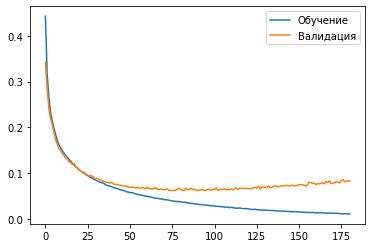

In [37]:
from matplotlib import pyplot
pyplot.plot(hist_lstm.history['loss'], label='Обучение')
pyplot.plot(hist_lstm.history['val_loss'], label='Валидация')
pyplot.legend()
pyplot.show()

### Прогноз 

In [29]:
%%time
y_pred=(model.predict(x_test) >= 0.15).astype(int)
y_pred = y_pred.reshape(np.shape(x_test)[0])


Wall time: 3.08 s


### Оценка

In [30]:
conf_mat = confusion_matrix(y_test_r, y_pred)
total = sum(sum(conf_mat))

specificity = (conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1]))*100
print('Specificity : ', specificity)
sensitivity= (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0]))*100

print('Sensitivity : ', sensitivity)

accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total*100
print('Accuracy    :  ',accuracy)

precision = (conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[0, 1]))*100
print("Precision   : ", precision)

Specificity :  95.42431497738761
Sensitivity :  99.12819014221704
Accuracy    :   98.13547237076648
Precision   :  98.3379233705368


#### сохранение модели

In [ ]:
from tensorflow.keras.models import load_model
LSTM =load_model('LSTM_try//LSTM.hdf5')